# sklearn

## accuracy (정확도)

In [63]:
import sklearn
from sklearn.base import BaseEstimator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

class MyDummyClassifier(BaseEstimator):
    #
    def fit(self, X, y=None):
        pass
    #
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1
        return pred

In [64]:
titanic_df = pd.read_csv('titanic_train.csv')
#
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
titanic_df['Fare'].fillna(0, inplace=True)
# 
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
#
col_names = ['Cabin', 'Sex', 'Embarked']
for col_name in col_names:
    le = LabelEncoder()
    le = le.fit(titanic_df[col_name])
    titanic_df[col_name] = le.transform(titanic_df[col_name])
#
y_titanic_s = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_s, test_size=0.2, random_state=0)
#
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)
#
y_pred = myclf.predict(x_test)
print('accuracy: ', accuracy_score(y_test, y_pred))

accuracy:  0.7877094972067039


C:\Users\User\AppData\Local\Temp\ipykernel_15500\339867617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15500\339867617.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

In [65]:
from sklearn.datasets import load_digits

class MyFakeClassifier(BaseEstimator):
    #
    def fit(self, X, y):
        pass
    #
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

digits = load_digits()
print(type(digits.data), digits.data.shape)
print(type(digits.target), digits.target.shape)
print(digits.target == 7)

y = (digits.target == 7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)
print(y_test.shape)
print(pd.Series(y_test).value_counts())

fakeclf = MyFakeClassifier()
fakeclf.fit(x_train, y_train)
y_pred = fakeclf.predict(x_test)
print(accuracy_score(y_test, y_pred))


<class 'numpy.ndarray'> (1797, 64)
<class 'numpy.ndarray'> (1797,)
[False False False ... False False False]
(450,)
0    405
1     45
Name: count, dtype: int64
0.9


## Confusion Matrix

In [66]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[405,   0],
       [ 45,   0]])

## 정밀도(Precision)와 재현율(Recall)

In [67]:
from sklearn.metrics import precision_score, recall_score

print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))

accuracy:  0.9
precision:  0.0
recall:  0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [68]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("# 오차행렬", confusion, sep="\n")
    print("accuary: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}".format(accuracy, precision, recall))

In [69]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_s, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
y_pred = lr_clf.predict(x_test)
get_clf_eval(y_test, y_pred)

# 오차행렬
[[109   9]
 [ 14  47]]
accuary: 0.8715, precision: 0.8393, recall: 0.7705


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision & Recall Trade-off

In [95]:
pred_proba = lr_clf.predict_proba(x_test)
y_pred = lr_clf.predict(x_test)

print(type(pred_proba), x_test.shape)
print(type(y_pred), y_pred.shape)

print("pred_proba() result shape : {0}".format(pred_proba.shape))
print("pred_proba array[:3]", pred_proba[:3], sep="\n")

pred_proba_result = np.concatenate([pred_proba, y_pred.reshape(-1, 1)], axis=1)
print("pred_proba_result array[:3]", pred_proba_result[:3], sep="\n")

<class 'numpy.ndarray'> (179, 8)
<class 'numpy.ndarray'> (179,)
pred_proba() result shape : (179, 2)
pred_proba array[:3]
[[0.44809347 0.55190653]
 [0.84842666 0.15157334]
 [0.84057425 0.15942575]]
pred_proba_result array[:3]
[[0.44809347 0.55190653 1.        ]
 [0.84842666 0.15157334 0.        ]
 [0.84057425 0.15942575 0.        ]]


In [71]:
from sklearn.preprocessing import Binarizer

x = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(x))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [98]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
print(type(custom_predict), custom_predict.shape, custom_predict[:3])
get_clf_eval(y_test, custom_predict)

<class 'numpy.ndarray'> (179, 1) [[1.]
 [0.]
 [0.]]
# 오차행렬
[[109   9]
 [ 14  47]]
accuary: 0.8715, precision: 0.8393, recall: 0.7705, f1: 0.8034


In [101]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1[:3], sep="\n")
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print("\nthreshold = ", custom_threshold)
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

<class 'numpy.ndarray'>
(179, 1)
[[0.55190653]
 [0.15157334]
 [0.15942575]]

threshold =  0.4
# 오차행렬
[[102  16]
 [ 13  48]]
accuary: 0.8380, precision: 0.7500, recall: 0.7869, f1: 0.7680

threshold =  0.45
# 오차행렬
[[106  12]
 [ 14  47]]
accuary: 0.8547, precision: 0.7966, recall: 0.7705, f1: 0.7833

threshold =  0.5
# 오차행렬
[[109   9]
 [ 14  47]]
accuary: 0.8715, precision: 0.8393, recall: 0.7705, f1: 0.8034

threshold =  0.55
# 오차행렬
[[111   7]
 [ 14  47]]
accuary: 0.8827, precision: 0.8704, recall: 0.7705, f1: 0.8174

threshold =  0.6
# 오차행렬
[[112   6]
 [ 18  43]]
accuary: 0.8659, precision: 0.8776, recall: 0.7049, f1: 0.7818


In [90]:
from sklearn.metrics import precision_recall_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)

print(type(pred_proba_class1), pred_proba_class1.shape)

print("thresholds: ", thresholds.shape)
print("precisions: ", precisions.shape)
print("recalls: ", recalls.shape)

print("thresholds 5: ", thresholds[:5])
print("precisions 5: ", precisions[:5])
print("recalls 5: ", recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print("샘플 추출을 위한 임계값 배열의 index 10개: ", thr_index, thr_index.shape)
print("샘플용 10개의 임계값 : ", np.round(thresholds[thr_index], 2))

print("샘플 임계값별 정밀도: ", np.round(precisions[thr_index], 3))
print("샘플 임계값별 재현율: ", np.round(recalls[thr_index], 3))

<class 'numpy.ndarray'> (179,)
thresholds:  (165,)
precisions:  (166,)
recalls:  (166,)
thresholds 5:  [0.01134211 0.06266795 0.08105687 0.08297918 0.08529759]
precisions 5:  [0.34078212 0.34269663 0.34463277 0.34659091 0.34857143]
recalls 5:  [1. 1. 1. 1. 1.]
샘플 추출을 위한 임계값 배열의 index 10개:  [  0  15  30  45  60  75  90 105 120 135 150] (11,)
샘플용 10개의 임계값 :  [0.01 0.12 0.14 0.16 0.18 0.23 0.34 0.42 0.62 0.75 0.86]
샘플 임계값별 정밀도:  [0.341 0.372 0.403 0.452 0.5   0.585 0.675 0.774 0.894 0.935 0.938]
샘플 임계값별 재현율:  [1.    1.    0.984 0.934 0.902 0.902 0.852 0.787 0.689 0.475 0.246]


<class 'pandas.core.series.Series'> (179,) 431    1
821    1
629    0
626    0
665    0
      ..
638    0
771    0
521    0
711    0
484    1
Name: Survived, Length: 179, dtype: int64
<class 'numpy.ndarray'> (179,) [0.55190653 0.15157334 0.15942575 0.13847871 0.16669284 0.13909361
 0.14044431 0.8116142  0.21997969 0.62162196 0.11593389 0.14300471
 0.15948202 0.14086761 0.40462303 0.17149166 0.12299412 0.27153981
 0.22629628 0.8355241  0.25159196 0.35942368 0.17674259 0.24348068
 0.14431961 0.23354131 0.15511874 0.08959866 0.28389076 0.25420815
 0.93395204 0.75645476 0.16911894 0.83804319 0.36246663 0.23354131
 0.0901347  0.61034367 0.06266795 0.13241128 0.3833527  0.09821357
 0.76865109 0.65240518 0.65794427 0.65806327 0.93623447 0.35772337
 0.93336346 0.14464427 0.46465679 0.14086761 0.16287347 0.72447758
 0.30958048 0.17941297 0.18519347 0.15943555 0.18552614 0.39651429
 0.28167112 0.11915166 0.42742427 0.51045355 0.3567477  0.12224726
 0.67805823 0.61579181 0.90971311 0.2024987  0.1

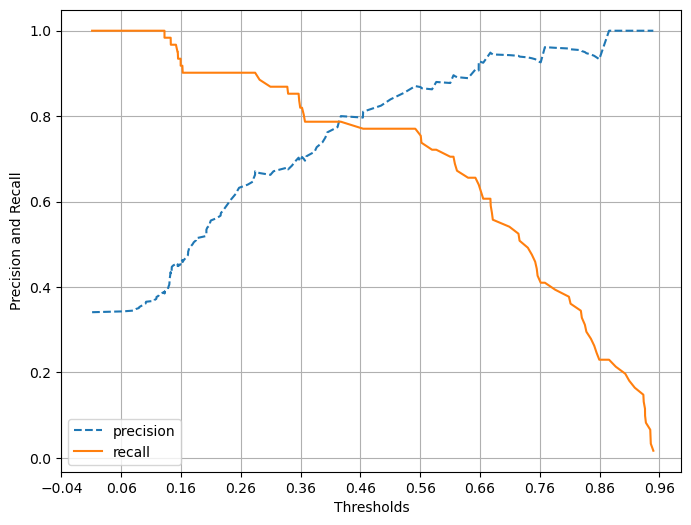

In [93]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    print(type(y_test), y_test.shape, y_test)
    print(type(pred_proba_c1), pred_proba_c1.shape, pred_proba_c1)
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    #
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    #
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    #
    plt.xlabel('Thresholds')
    plt.ylabel('Precision and Recall')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

## F1 Score

In [76]:
from sklearn.metrics import f1_score
fi = f1_score(y_test, y_pred)
print("f1_score: ", fi)

f1_score:  0.8034188034188035


In [84]:
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("# 오차행렬", confusion, sep="\n")
    print("accuary: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}".format(accuracy, precision, recall, f1))

thresholds = [0.4, 0.45, 0.5, 0.55, 0.6]
pred_proba = lr_clf.predict_proba(x_test)
print(type(x_test), x_test.shape)
print(type(pred_proba), pred_proba)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

<class 'pandas.core.frame.DataFrame'> (179, 8)
<class 'numpy.ndarray'> [[0.44809347 0.55190653]
 [0.84842666 0.15157334]
 [0.84057425 0.15942575]
 [0.86152129 0.13847871]
 [0.83330716 0.16669284]
 [0.86090639 0.13909361]
 [0.85955569 0.14044431]
 [0.1883858  0.8116142 ]
 [0.78002031 0.21997969]
 [0.37837804 0.62162196]
 [0.88406611 0.11593389]
 [0.85699529 0.14300471]
 [0.84051798 0.15948202]
 [0.85913239 0.14086761]
 [0.59537697 0.40462303]
 [0.82850834 0.17149166]
 [0.87700588 0.12299412]
 [0.72846019 0.27153981]
 [0.77370372 0.22629628]
 [0.1644759  0.8355241 ]
 [0.74840804 0.25159196]
 [0.64057632 0.35942368]
 [0.82325741 0.17674259]
 [0.75651932 0.24348068]
 [0.85568039 0.14431961]
 [0.76645869 0.23354131]
 [0.84488126 0.15511874]
 [0.91040134 0.08959866]
 [0.71610924 0.28389076]
 [0.74579185 0.25420815]
 [0.06604796 0.93395204]
 [0.24354524 0.75645476]
 [0.83088106 0.16911894]
 [0.16195681 0.83804319]
 [0.63753337 0.36246663]
 [0.76645869 0.23354131]
 [0.9098653  0.0901347 ]
 [0.

## ROC Curve & AUC

In [78]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]
fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
thr_index = np.arange(0, thresholds.shape[0], 5)

print("샘플 추출을 위한 임계값 배열의 index: ", thr_index)
print("샘플 index로 추출한 임계값: ", np.round(thresholds[thr_index], 2))

print("샘플 임계값별 FRP: ", np.round(fprs[thr_index], 3))
print("샘플 임계값별 TPR: ", np.round(tprs[thr_index], 3))

샘플 추출을 위한 임계값 배열의 index:  [ 0  5 10 15 20 25 30 35 40 45]
샘플 index로 추출한 임계값:  [ inf 0.86 0.66 0.61 0.43 0.34 0.23 0.16 0.15 0.14]
샘플 임계값별 FRP:  [0.    0.008 0.025 0.051 0.102 0.212 0.331 0.559 0.602 0.712]
샘플 임계값별 TPR:  [0.    0.23  0.639 0.705 0.787 0.852 0.902 0.918 0.967 0.984]


In [79]:
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]
print("max pred_proba : ", np.max(pred_proba_class1))

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
print("thresholds[0] : ", thresholds[0])

thr_index = np.arange(0, thresholds.shape[0], 5)
print("샘플 추출을 위한 임계값 배열의 index: ", thr_index)
print("샘플 index로 추출한 임계값: ", np.round(thresholds[thr_index], 2))

print("샘플 임계값별 FRP: ", np.round(fprs[thr_index], 3))
print("샘플 임계값별 TPR: ", np.round(tprs[thr_index], 3))

max pred_proba :  0.9500443693555766
thresholds[0] :  inf
샘플 추출을 위한 임계값 배열의 index:  [ 0  5 10 15 20 25 30 35 40 45]
샘플 index로 추출한 임계값:  [ inf 0.86 0.66 0.61 0.43 0.34 0.23 0.16 0.15 0.14]
샘플 임계값별 FRP:  [0.    0.008 0.025 0.051 0.102 0.212 0.331 0.559 0.602 0.712]
샘플 임계값별 TPR:  [0.    0.23  0.639 0.705 0.787 0.852 0.902 0.918 0.967 0.984]


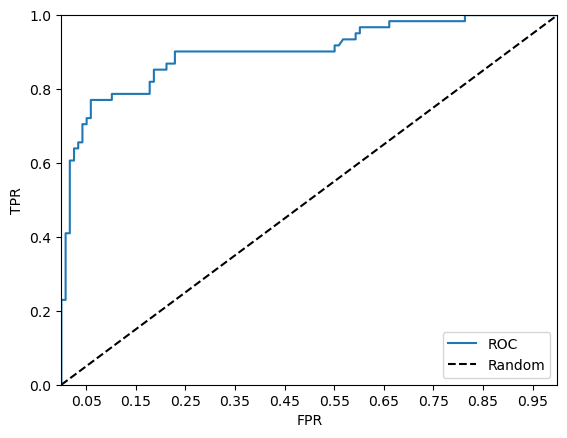

In [81]:
def roc_curve_plot(y_test, pred_proba_c1):
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    #
    plt.plot(fprs, tprs, label="ROC")
    plt.plot([0, 1], [0, 1], "k--", label="Random")
    #
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.legend()
    plt.show()

roc_curve_plot(y_test, pred_proba[:,1])


In [82]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(x_test)[:,1]
roc_auc = roc_auc_score(y_test, pred_proba)
print("ROC AUC: {0:.4f}".format(roc_auc))

ROC AUC: 0.9013


In [83]:
def get_clf_eval(y_test, y_pred=None, pre_proba=None):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, pre_proba)
    print("# 오차행렬", confusion, sep="\n")
    print("accuary: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, f1: {3:.4f}, roc_auc: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))